In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import helper
import cmath


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data"

csi_long = dict()
csi_long2 = dict()

csi_long["l"], csi_long["h"], all_data = helper.load_csi(f"{data_dir}/S3_wired_extclk_2_8.csv",
                                                         helper.legacy_list, helper.ht_list)

dc_phases_movement, slopes_movement = helper.compute_offsets(csi_long['h'], helper.f_sub, helper.f_c)

csi_long2["l"], csi_long2["h"], all_data2 = helper.load_csi(f"{data_dir}/S3_wired_extclk_1_8.csv",
                                                            helper.legacy_list, helper.ht_list)

dc_phases_movement2, slopes_movement2 = helper.compute_offsets(csi_long2['h'], helper.f_sub, helper.f_c)

# Plotting using subplots
fig, axs = plt.subplots(5, 1, figsize=(6, 9))
fig.tight_layout(pad=5.0)

# Plot the phases across subcarriers for first dataset
skip_rows = 5
phases = np.unwrap(np.angle(csi_long["h"]), axis=1) #* 180 / np.pi
axs[0].plot(helper.f_sub, phases[::skip_rows][:].T)
axs[0].set_title("Phases across subcarriers (Dataset 1)")
axs[0].set_xlabel("Sub-C Frequency")
axs[0].set_ylabel("Phases (deg)")

# print(len(phases[0]))

# # Plot the phases across subcarriers for second dataset
phases2 = np.unwrap(np.angle(csi_long2["h"]), axis=1) #* 180 / np.pi
# axs[0, 1].plot(helper.f_sub, phases2[::skip_rows][:].T)
# # axs[0, 1].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
# axs[0, 1].set_title("Phases across subcarriers (Dataset 2)")
# axs[0, 1].set_xlabel("Sub-C Frequency")
# axs[0, 1].set_ylabel("Phases (deg)")

# Plot DC phases over packets for first dataset
# axs[1, 0].scatter(np.arange(len(dc_phases_movement)),(dc_phases_movement) * 180 / np.pi, s=5)
axs[1].plot(helper.f_sub, phases[0][:] - phases2[0][:])
axs[1].set_title("Phase Difference across subcarriers for Packet 1")
axs[1].set_xlabel("Sub-C Frequency")
axs[1].set_ylabel("Phases (deg)")

# Plot DC phases over packets for second dataset
# axs[1, 1].scatter(np.arange(len(dc_phases_movement2)),(dc_phases_movement2) * 180 / np.pi, s=5)
axs[2].plot(np.arange(len(dc_phases_movement2)),np.unwrap(dc_phases_movement-dc_phases_movement2) * 180 / np.pi)
# axs[2].plot(np.arange(len(dc_phases_movement2)),(dc_phases_movement-dc_phases_movement2) * 180 / np.pi)

# axs[1, 1].plot((dc_phases_movement2) * 180 / np.pi, ".-")
axs[2].set_title("DC phase difference")
axs[2].set_xlabel("Packets")
axs[2].set_ylabel("Phases (deg)")

axs[3].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
axs[3].set_title("Phase difference across subcarriers")
axs[3].set_xlabel("Sub-C Frequency")
axs[3].set_ylabel("Phases (deg)")

axs[4].plot((np.std(phases[::].T-phases2[::].T, axis=0)), ".-")
# axs[2, 0].hist((np.std(phases[::].T-phases2[::].T, axis=0)), bins=20)
axs[4].set_title("Std. Dev. of phase difference across all Sub-C")
axs[4].set_xlabel("Packets")
axs[4].set_ylabel("Std. Dev. (deg)")

# print((np.std(phases[::skip_rows].T-phases2[::skip_rows].T, axis=0)))
print(np.std(np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))

print(np.std(np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))

# print((phases[0][:])- (phases2[0][:]))
# print((phases[1][:])- (phases2[1][:]))
# print((phases[3][:])- (phases2[3][:]))


plt.show()
# This code will plot all four plots in a 2x2 grid layout. Adjust the figsize parameter as needed to resize the entire figure.




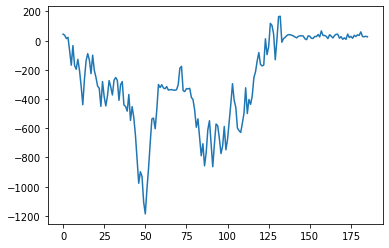

In [79]:
import cmath
plt.plot( np.unwrap(np.angle((np.exp(1j*dc_phases_movement) / np.exp( 1j*dc_phases_movement2))))*180/np.pi)

In [73]:
np.std(np.angle((np.exp(1j*phases[0][:]) / np.exp( 1j*phases2[0][:])))*180/np.pi)

3.8723744252208956

In [57]:
len(np.mean(phases-phases2, axis=1))


186

(-200.0, 200.0)

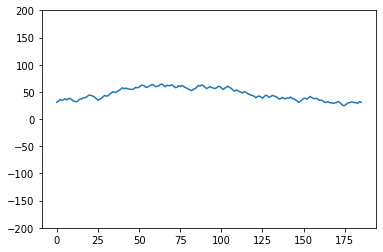

In [58]:
plt.plot(np.unwrap(np.mean(phases[:]-phases2, axis=1)))
plt.ylim((-200,200))

(-180.0, 180.0)

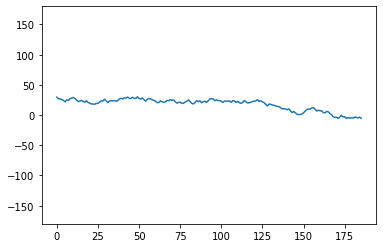

In [59]:
plt.plot(np.unwrap(np.mean(phases[:,7:59]-phases2[:,7:59], axis=1)))
plt.ylim((-180,180))

In [60]:
np.std(np.unwrap(np.mean(phases[:,7:59]-phases2[:,7:59], axis=1)))

9.90394378889308

202it [00:00, 3092.75it/s]
202it [00:00, 2930.42it/s]


Std. Dev of DC Phase 7.272860266932453
No. of packets,  202
7.272860266932467
Std. dev of mean phase across Sub-C:  4.351398675244299


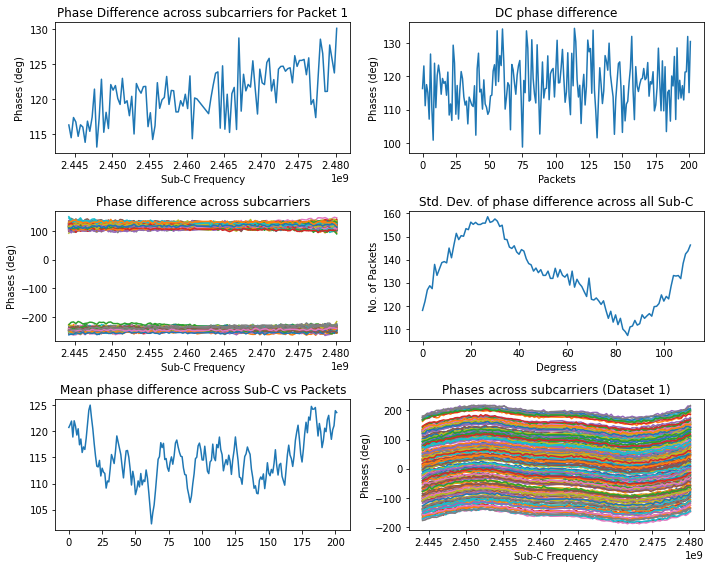

In [29]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import helper


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

csi_long = dict()
csi_long2 = dict()

file_1 = "CSI_1.csv"
file_2 = "CSI_2.csv"

# Comment this out if packet matching is not required
# helper.match_packets(file_1, file_2, data_dir)

csi_long["l"], csi_long["h"], all_data = helper.load_csi(f"{data_dir+file_1}",
                                                         helper.legacy_list, helper.ht_list)

dc_phases_movement, slopes_movement = helper.compute_offsets(
    csi_long['h'], helper.f_sub, helper.f_c)

csi_long2["l"], csi_long2["h"], all_data2 = helper.load_csi(f"{data_dir+file_2}",
                                                            helper.legacy_list, helper.ht_list)

dc_phases_movement2, slopes_movement2 = helper.compute_offsets(
    csi_long2['h'], helper.f_sub, helper.f_c)

# Plotting using subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
fig.tight_layout(pad=5.0)

# Plot the phases across subcarriers for first dataset
skip_rows = 1
phases = np.unwrap(np.angle(csi_long["h"]), axis=1) * 180 / np.pi
axs[2, 1].plot(helper.f_sub, phases[::skip_rows][:].T)
axs[2, 1].set_title("Phases across subcarriers (Dataset 1)")
axs[2, 1].set_xlabel("Sub-C Frequency")
axs[2, 1].set_ylabel("Phases (deg)")

# print(len(phases[0]))

# # Plot the phases across subcarriers for second dataset
phases2 = np.unwrap(np.angle(csi_long2["h"]), axis=1) * 180 / np.pi
# axs[0, 1].plot(helper.f_sub, phases2[::skip_rows][:].T)
# # axs[0, 1].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
# axs[0, 1].set_title("Phases across subcarriers (Dataset 2)")
# axs[0, 1].set_xlabel("Sub-C Frequency")
# axs[0, 1].set_ylabel("Phases (deg)")

# Plot DC phases over packets for first dataset
# axs[1, 0].scatter(np.arange(len(dc_phases_movement)),(dc_phases_movement) * 180 / np.pi, s=5)
axs[0, 0].plot(helper.f_sub, phases[0][:] - phases2[0][:])
# axs[1].plot(helper.f_sub, phases[0][:] - phases2[0][:])

axs[0, 0].set_title("Phase Difference across subcarriers for Packet 1")
axs[0, 0].set_xlabel("Sub-C Frequency")
axs[0, 0].set_ylabel("Phases (deg)")

# Plot DC phases over packets for second dataset
# axs[1, 1].scatter(np.arange(len(dc_phases_movement2)),(dc_phases_movement2) * 180 / np.pi, s=5)
axs[0, 1].plot(np.arange(len(dc_phases_movement2)), np.unwrap(
    dc_phases_movement-dc_phases_movement2) * 180 / np.pi)
# axs[2].plot(np.arange(len(dc_phases_movement2)),(dc_phases_movement-dc_phases_movement2) * 180 / np.pi)

# axs[1, 1].plot((dc_phases_movement2) * 180 / np.pi, ".-")
axs[0, 1].set_title("DC phase difference")
axs[0, 1].set_xlabel("Packets")
axs[0, 1].set_ylabel("Phases (deg)")

axs[1, 0].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
axs[1, 0].set_title("Phase difference across subcarriers")
axs[1, 0].set_xlabel("Sub-C Frequency")
axs[1, 0].set_ylabel("Phases (deg)")

# axs[4].plot((np.std(phases[::].T-phases2[::].T, axis=0)), ".-")
stddev_all = np.std(np.unwrap(phases[::].T-phases2[::].T), axis=0)
# axs[1, 1].hist((stddev_all), bins=20)
axs[1, 1].plot(phases[0])

axs[1, 1].set_title("Std. Dev. of phase difference across all Sub-C")
axs[1, 1].set_xlabel("Degress")
axs[1, 1].set_ylabel("No. of Packets")

# print((np.std(phases[::skip_rows].T-phases2[::skip_rows].T, axis=0)))
print("Std. Dev of DC Phase", np.std(
    np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))
print("No. of packets, ", (np.std(phases[::].T-phases2[::].T, axis=0)).size)
# print(np.std(np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))

# print((phases[0][:])- (phases2[0][:]))
# print((phases[1][:])- (phases2[1][:]))
# print((phases[3][:])- (phases2[3][:]))
# plt.figure()
mean_all = np.unwrap(np.mean(phases[:]-phases2, axis=1))
print(np.std(np.unwrap(np.angle(
    (np.exp(1j*dc_phases_movement) / np.exp(1j*dc_phases_movement2))))*180/np.pi))
axs[2, 0].plot(mean_all)
axs[2, 0].set_title("Mean phase difference across Sub-C vs Packets")
# axs[5].set_ylim((-200,200))
# plt.xlim((0,50))
print("Std. dev of mean phase across Sub-C: ", np.std(mean_all))
plt.tight_layout()

plt.show()


# %%


In [7]:
stddev_all = np.std(np.unwrap(phases[::].T-phases2[::].T), axis=1)


In [8]:
np.argsort(stddev_all)

array([ 12,  31,   0,  97,  41,  73,  27,  11,  68,  57,  78,   1,  87,
        80,  38,  95, 102,  72,  37,   9,  64,  85,  32,  63,  79,  24,
        29,  18,  44,  76, 111, 109,  94,   7,  91,  81,  22,   5,  98,
        90, 104,  35, 100,  43,  58,  59,  53,  20,  30, 105,   3,  23,
       106,  83,  47,  77,  56,  16,  15,  33,  21,  50, 110,  67,   4,
       107,  40,  69, 108,  52,  51,  62,  36,  70,  60,  13,  39,  49,
        42,  48,  54,  88,  65,  96,  14,  84,  46,  75,  66,  71,  19,
         2,  99,  82,  25,  17,  89, 103,  55,   8,  45,  10,  86, 101,
        92,  34,  74,  26,   6,  28,  93,  61])

In [12]:
stddev_all[0]

12.752572235142727

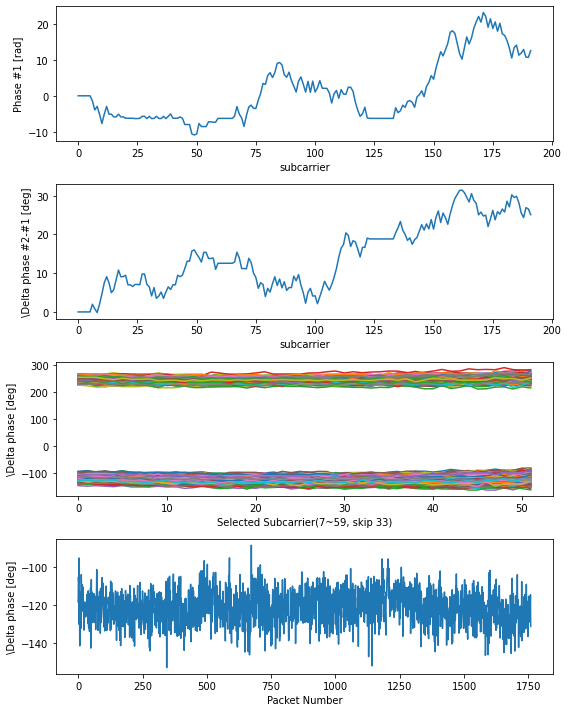

9.057633701810376


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

data_1 = "S3_wireless_intclk_1_2"
data_2 = "S3_wireless_intclk_2_2"

# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

lengCM = T1.iloc[0, 22]  # assuming the indices in MATLAB start from 1

CMatrix1 = []
PMatrix1 = []
CMatrix2 = []
PMatrix2 = []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.array(PMatrix1)
PMatrix2 = np.array(PMatrix2)

PDiff = PMatrix2 - PMatrix1

plt.figure(figsize=(8, 10))

# Plot
plt.subplot(4, 1, 1)
plt.plot(np.unwrap(PMatrix1[0, :] * 180 / np.pi))
plt.xlabel('subcarrier')
plt.ylabel('Phase #1 [rad]')

plt.subplot(4, 1, 2)
plt.plot(np.unwrap(PDiff[0, :] * 180 / np.pi))
plt.xlabel('subcarrier')
plt.ylabel('\Delta phase #2-#1 [deg]')

# PDiffSel = np.delete(PDiff, 32, axis=1)  # delete 33rd column
PDiffSel = PDiff[:, list(range(6, 32)) + list(range(33, 59))]
# PDiffSel = PDiff
PDiffSelUW = np.unwrap(PDiffSel)
PhopAve = np.mean(PDiffSelUW, axis=1)

plt.subplot(4, 1, 3)
plt.plot((np.transpose(PDiffSelUW) * 180 / np.pi))
plt.xlabel('Selected Subcarrier(7~59, skip 33)')
plt.ylabel('\Delta phase [deg]')

plt.subplot(4, 1, 4)
plt.plot(np.unwrap(PhopAve) * 180 / np.pi)
plt.xlabel('Packet Number')
plt.ylabel('\Delta phase [deg]')

plt.tight_layout()
plt.show()

print(np.std(np.unwrap(PhopAve) * 180 / np.pi))

# data = (np.unwrap(PhopAve) * 180 / np.pi)
# mean = np.mean(data)
# sem = stats.sem(data)
# confidence_level = 0.95
# degrees_freedom = len(data) - 1
# confidence_interval = stats.t.interval(
#     confidence_level, degrees_freedom, mean, sem)

# print("95% confidence interval:", confidence_interval)


In [3]:
data

array([-118.41330099, -105.179223  , -107.7514447 , ..., -120.22795938,
       -114.53704501, -131.29947408])

In [46]:
len(PDiffSelUW[0])


191

In [47]:
len

<function len(obj, /)>

In [1]:
scipy

NameError: name 'scipy' is not defined

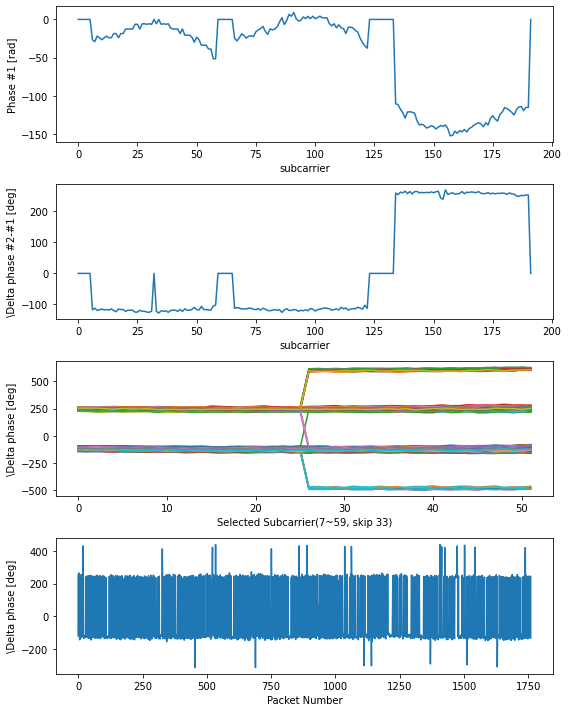

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

data_1 = "S3_wireless_intclk_1_2"
data_2 = "S3_wireless_intclk_2_2"

# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

lengCM = T1.iloc[0, 22]  # assuming the indices in MATLAB start from 1

CMatrix1 = []
PMatrix1 = []
CMatrix2 = []
PMatrix2 = []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.unwrap(np.array(PMatrix1))*180/np.pi
PMatrix2 = np.unwrap(np.array(PMatrix2))*180/np.pi

PDiff = PMatrix2 - PMatrix1

plt.figure(figsize=(8, 10))

# Plot
plt.subplot(4, 1, 1)
plt.plot((PMatrix1[0, :]))
plt.xlabel('subcarrier')
plt.ylabel('Phase #1 [rad]')

plt.subplot(4, 1, 2)
plt.plot((PDiff[0, :]))
plt.xlabel('subcarrier')
plt.ylabel('\Delta phase #2-#1 [deg]')

# PDiffSel = np.delete(PDiff, 32, axis=1)  # delete 33rd column
PDiffSel = PDiff[:, list(range(6, 32)) + list(range(33, 59))]
# PDiffSel = PDiff
PDiffSelUW = (PDiffSel)
PhopAve = np.mean(PDiffSelUW, axis=1)

plt.subplot(4, 1, 3)
plt.plot((np.transpose(PDiffSelUW)))
plt.xlabel('Selected Subcarrier(7~59, skip 33)')
plt.ylabel('\Delta phase [deg]')

plt.subplot(4, 1, 4)
plt.plot(PhopAve) 
plt.xlabel('Packet Number')
plt.ylabel('\Delta phase [deg]')

plt.tight_layout()
plt.show()


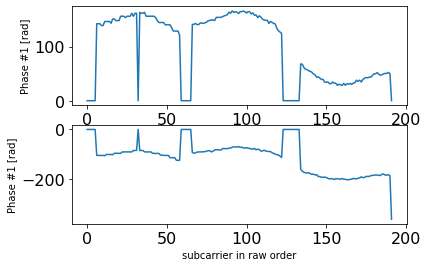

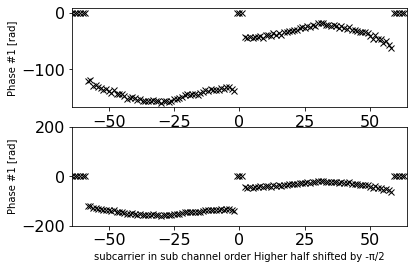

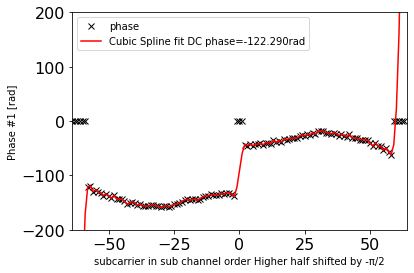

(-400.0, 200.0)

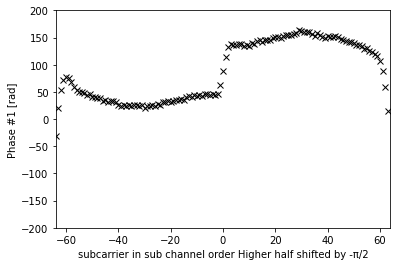

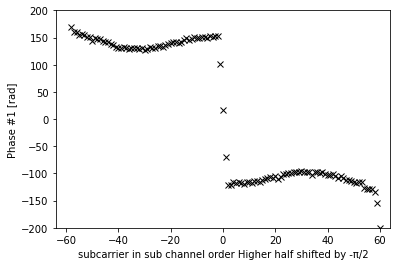

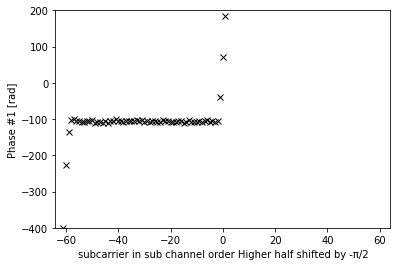

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

data_1 = "CSI_1"
data_2 = "CSI_2"

# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

NumPCT = min(len(T1), len(T2))
lengCM = T1.iloc[0, 22]  # Assuming indexing starts from 0

C1, C2, CMatrix1, PMatrix1, CMatrix2, PMatrix2 = [], [], [], [], [], []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        # c1_complex[:(lengCM//2)] = -1j * c1_complex[:(lengCM//2)]
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        # c2_complex[:((lengCM+1)//2)] = -1j * c2_complex[:((lengCM+1)//2)]
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    # c_matrix_1_row[((lengCM+1)//2):].imag = -1j * c_matrix_1_row[((lengCM+1)//2):].imag
    # c_matrix_2_row[((lengCM+1)//2):].imag = -1j * c_matrix_2_row[((lengCM+1)//2):].imag

    c_matrix_1_row = [c.real + c.imag*(-1j)
                  for c in c_matrix_1_row[((lengCM+1)//2):]]
    c_matrix_2_row = [c.real + c.imag*(-1j)
                      for c in c_matrix_2_row[((lengCM+1)//2):]]


    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.unwrap(np.array(PMatrix1))*180/np.pi
PMatrix2 = np.unwrap(np.array(PMatrix2))*180/np.pi

plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot((PMatrix1[9]))
plt.xlabel('subcarrier in raw order')
plt.ylabel('Phase #1 [rad]')
# plt.ylim([-np.pi, np.pi])
plt.gca().tick_params(axis='both', which='major', labelsize=16)

plt.subplot(2, 1, 2)
plt.plot((PMatrix2[9]))
plt.xlabel('subcarrier in raw order')
plt.ylabel('Phase #1 [rad]')
# plt.ylim([-np.pi, np.pi])
plt.gca().tick_params(axis='both', which='major', labelsize=16)

SubChannel = np.arange(-64, 64)
PhaseSub1 = np.column_stack((PMatrix1[:, 128:192], PMatrix1[:, 64:128]))
PhaseSub2 = np.column_stack((PMatrix2[:, 128:192], PMatrix2[:, 64:128]))

plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(SubChannel, PhaseSub1[0], 'kx')
plt.xlabel('subcarrier in sub channel order')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
# plt.ylim([-np.pi, np.pi])
plt.gca().tick_params(axis='both', which='major', labelsize=16)

PhaseSubShiftHigh1 = PhaseSub1.copy()
PhaseSubShiftHigh2 = PhaseSub2.copy()

# PhaseSubShiftHigh1[:, 66:123] -= 90 #np.pi/2
# PhaseSubShiftHigh2[:, 66:123] -= 90  # np.pi/2

plt.subplot(2, 1, 2)
plt.plot(SubChannel, PhaseSubShiftHigh1[0], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])
plt.gca().tick_params(axis='both', which='major', labelsize=16)

SubChannelSelect = np.hstack((np.arange(-58, -1), np.arange(2, 59)))
PhaseSubShiftHighSelect1 = PhaseSubShiftHigh1[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]
PhaseSubShiftHighSelect2 = PhaseSubShiftHigh2[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]

yy1, yy2 = [], []

for i in range(NumPCT):
    cs1 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect1[i])
    cs2 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect2[i])

    yy1.append(cs1(SubChannel))
    yy2.append(cs2(SubChannel))

yy1 = np.array(yy1)
yy2 = np.array(yy2)

plt.figure(3)
plt.plot(SubChannel, PhaseSubShiftHigh1[0], 'kx', SubChannel, yy1[0], 'r-')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])
plt.legend(
    ['phase', f'Cubic Spline fit DC phase={yy1[0][63]:.3f}rad'], loc='best')
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.show()

plt.figure(4)
plt.plot(SubChannel,  yy1[8], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])


plt.figure(5)
plt.plot(SubChannel,  yy2[8], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])

plt.figure(6)
plt.plot(SubChannel,  (yy1[8]-yy2[8]), 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-400, 200])


In [192]:
(c_matrix_1_row[10]-1j)


(8-7j)

In [1]:
stan = np.std((yy1[:,8:120]-yy2[:,8:120]), axis = 1)
print(len(stan))
stan = stan[stan<100]
print(len(stan))

plt.hist(stan, bins =20)

NameError: name 'np' is not defined

In [64]:
(yy1[:,8:120]-yy2[:,8:120])


(202, 112)

In [63]:
yy1.shape

(202, 128)

In [25]:
yy1[1][:5]

array([437.89796778, 359.34393093, 297.74446757, 251.05496023,
       217.23079149])

(-200.0, 200.0)

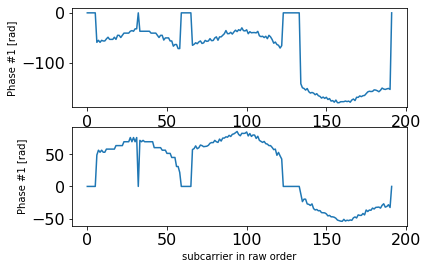

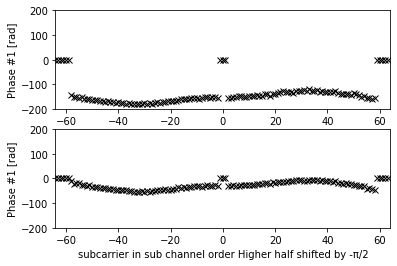

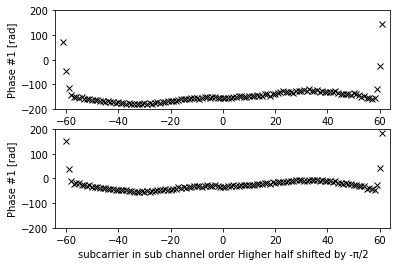

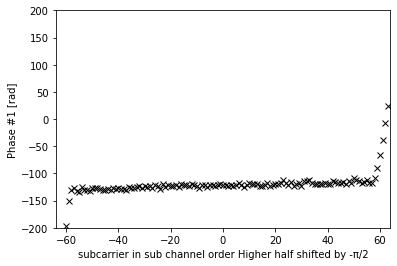

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import helper

data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

data_1 = "CSI_1"
data_2 = "CSI_2"

# helper.match_packets(data_1, data_2, data_dir)

packet = 1 

# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

NumPCT = min(len(T1), len(T2))
lengCM = T1.iloc[0, 22]  # Assuming indexing starts from 0

C1, C2, CMatrix1, PMatrix1, CMatrix2, PMatrix2 = [], [], [], [], [], []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.unwrap(np.array(PMatrix1))*180/np.pi
PMatrix2 = np.unwrap(np.array(PMatrix2))*180/np.pi

SubChannel = np.arange(-64, 64)
PhaseSub1 = np.column_stack((PMatrix1[:, 128:192], PMatrix1[:, 64:128]))
PhaseSub2 = np.column_stack((PMatrix2[:, 128:192], PMatrix2[:, 64:128]))

PhaseSubShiftHigh1 = PhaseSub1.copy()
PhaseSubShiftHigh2 = PhaseSub2.copy()

for i in range(PhaseSubShiftHigh1.shape[0]):
    # shift1 = PhaseSubShiftHigh1[i, 15]-PhaseSubShiftHigh1[i, 105]
    shift1 = np.min(PhaseSubShiftHigh1[i, 6: 60]) - \
        np.max(PhaseSubShiftHigh1[i, 66: 120])
    multiplier1 = shift1//90+1
    # shift2 = PhaseSubShiftHigh2[i, 15]-PhaseSubShiftHigh2[i, 105]
    shift2 = np.min(PhaseSubShiftHigh2[i, 6: 60]) - \
        np.max(PhaseSubShiftHigh2[i, 66: 120])
    multiplier2 = shift2//90+1

    if shift1 > 0:
        PhaseSubShiftHigh1[i, 66:123] -= 90*multiplier1  # np.pi/2
    else:
        PhaseSubShiftHigh1[i, 66:123] += 90*multiplier1  # np.pi/2
    if shift1 > 0:
        PhaseSubShiftHigh2[i, 66:123] -= 90*multiplier2  # np.pi/2
    else:
        PhaseSubShiftHigh2[i, 66:123] += 90*multiplier2  # np.pi/2
    # PhaseSubShiftHigh2[i, 66:123] -= 90  # np.pi/2

SubChannelSelect = np.hstack((np.arange(-58, -1), np.arange(2, 59)))
PhaseSubShiftHighSelect1 = PhaseSubShiftHigh1[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]
PhaseSubShiftHighSelect2 = PhaseSubShiftHigh2[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]

yy1, yy2 = [], []

for i in range(NumPCT):
    cs1 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect1[i])
    cs2 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect2[i])

    yy1.append(cs1(SubChannel))
    yy2.append(cs2(SubChannel))

yy1 = np.array(yy1)
yy2 = np.array(yy2)

plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot((PMatrix1[packet]))
plt.xlabel('subcarrier in raw order')
plt.ylabel('Phase #1 [rad]')
# plt.ylim([-np.pi, np.pi])
plt.gca().tick_params(axis='both', which='major', labelsize=16)

plt.subplot(2, 1, 2)
plt.plot((PMatrix2[packet]))
plt.xlabel('subcarrier in raw order')
plt.ylabel('Phase #1 [rad]')
# plt.ylim([-np.pi, np.pi])
plt.gca().tick_params(axis='both', which='major', labelsize=16)

plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(SubChannel,  PhaseSubShiftHigh1[packet], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])

plt.subplot(2, 1, 2)
plt.plot(SubChannel,  PhaseSubShiftHigh2[packet], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])

plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(SubChannel,  yy1[packet], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])

plt.subplot(2, 1, 2)
plt.plot(SubChannel,  yy2[packet], 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])

plt.figure(4)
plt.plot(SubChannel,  (yy1[packet]-yy2[packet]), 'kx')
plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
plt.ylabel('Phase #1 [rad]')
plt.xlim([-64, 64])
plt.ylim([-200, 200])

# plt.figure(3)
# plt.plot(SubChannel, PhaseSubShiftHigh1[0], 'kx', SubChannel, yy1[0], 'r-')
# plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
# plt.ylabel('Phase #1 [rad]')
# plt.xlim([-64, 64])
# plt.ylim([-200, 200])
# plt.legend(
#     ['phase', f'Cubic Spline fit DC phase={yy1[0][63]:.3f}rad'], loc='best')
# plt.gca().tick_params(axis='both', which='major', labelsize=16)
# plt.show()

# plt.figure(4)
# plt.plot(SubChannel,  yy1[8], 'kx')
# plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
# plt.ylabel('Phase #1 [rad]')
# plt.xlim([-64, 64])
# plt.ylim([-200, 200])


# plt.figure(5)
# plt.plot(SubChannel,  yy2[8], 'kx')
# plt.xlabel('subcarrier in sub channel order Higher half shifted by -π/2')
# plt.ylabel('Phase #1 [rad]')
# plt.xlim([-64, 64])
# plt.ylim([-200, 200])




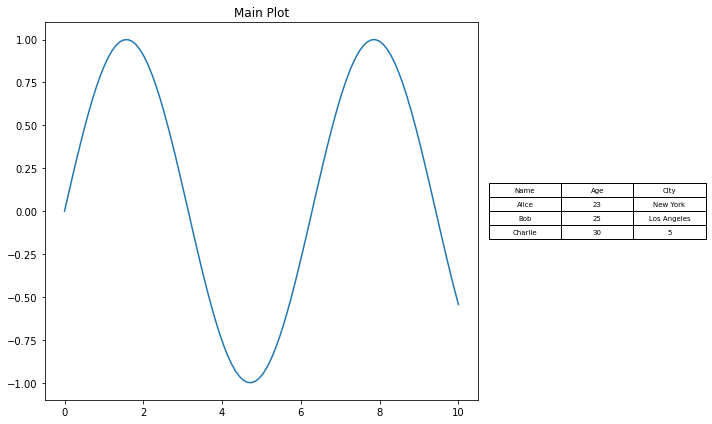

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create some example data for plotting
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and GridSpec layout
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.5])

# Create the main plot on the left
ax = fig.add_subplot(gs[0])
ax.plot(x, y)
ax.set_title('Main Plot')

# Add table on the right
ax_table = fig.add_subplot(gs[1], frame_on=False)  # No frame
ax_table.axis('off')  # Turn off the axis

a=5
# Table data
columns = ['Name', 'Age', 'City']
cell_text = [
    ['Alice', '23', 'New York'],
    ['Bob', '25', 'Los Angeles'],
    ['Charlie', '30', a]
]

# Create table
ax_table.table(cellText=cell_text, colLabels=columns,
               cellLoc='center', loc='center')

plt.tight_layout()
plt.show()


In [209]:
from prettytable import PrettyTable

# Define a table
x = PrettyTable()

# Set column names
x.field_names = ["Name", "Age", "City"]

# Add rows
x.add_row(["Alice", 24, "New York"])
x.add_row(["Bob", 22, "Los Angeles"])
x.add_row(["Charlie", 27, "San Francisco"])

# Print the table
print(x)


+---------+-----+---------------+
|   Name  | Age |      City     |
+---------+-----+---------------+
|  Alice  |  24 |    New York   |
|   Bob   |  22 |  Los Angeles  |
| Charlie |  27 | San Francisco |
+---------+-----+---------------+


In [2]:
RSSI

NameError: name 'RSSI' is not defined

In [152]:
PhaseSubShiftHigh1[0, 15]-(PhaseSubShiftHigh1[0, 105] )#+ 270)


-113.2052745756236

In [8]:
delta = delta = "\u0394"
print(delta)
print(delta)


Δ


In [151]:
-65+50

-15

In [106]:
len(PhaseSubShiftHigh2[:, 30])


202

In [ ]:
50     -200
-50    -200
# 50      200
-50     200

In [ ]:
-250 +270 +30
150 - 180  +20
# 150  -180   -20
-250 +270 +30


In [125]:
(-150//90)

-2

In [119]:
5//2

2

440
377
+--------+------------------+------+
| Packet | ΔPhase Std. Dev. | RSSI |
+--------+------------------+------+
|   10   |       5.68       | -38  |
+--------+------------------+------+


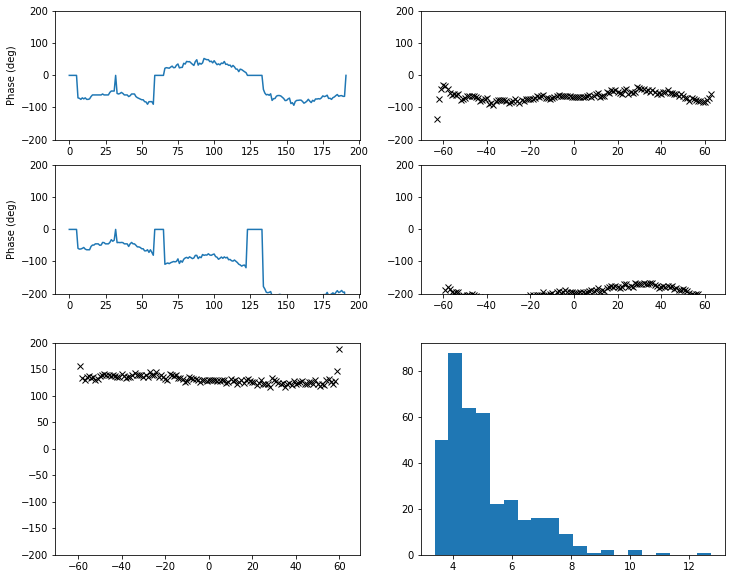

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import helper
import matplotlib.gridspec as gridspec
from prettytable import PrettyTable



data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

data_1 = "CSI_1"
data_2 = "CSI_2"

data_1 = "S3_wired_intclk_2_1"
data_2 = "S3_wired_intclk_1_1"

# helper.match_packets(data_1, data_2, data_dir)

packet = 10

# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

NumPCT = min(len(T1), len(T2))
lengCM = T1.iloc[0, 22]  # Assuming indexing starts from 0
RSSI = T1.iloc[packet,3]

C1, C2, CMatrix1, PMatrix1, CMatrix2, PMatrix2 = [], [], [], [], [], []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.unwrap(np.array(PMatrix1))*180/np.pi
PMatrix2 = np.unwrap(np.array(PMatrix2))*180/np.pi

SubChannel = np.arange(-64, 64)
PhaseSub1 = np.column_stack((PMatrix1[:, 128:192], PMatrix1[:, 64:128]))
PhaseSub2 = np.column_stack((PMatrix2[:, 128:192], PMatrix2[:, 64:128]))

PhaseSubShiftHigh1 = PhaseSub1.copy()
PhaseSubShiftHigh2 = PhaseSub2.copy()

for i in range(PhaseSubShiftHigh1.shape[0]):
    # shift1 = PhaseSubShiftHigh1[i, 15]-PhaseSubShiftHigh1[i, 105]
    shift1 = np.min(PhaseSubShiftHigh1[i, 6: 60]) - \
        np.max(PhaseSubShiftHigh1[i, 66: 120])
    multiplier1 = shift1//90+1
    # shift2 = PhaseSubShiftHigh2[i, 15]-PhaseSubShiftHigh2[i, 105]
    shift2 = np.min(PhaseSubShiftHigh2[i, 6: 60]) - \
        np.max(PhaseSubShiftHigh2[i, 66: 120])
    multiplier2 = shift2//90+1

    if shift1 > 0:
        PhaseSubShiftHigh1[i, 66:123] -= 90*multiplier1  # np.pi/2
    else:
        PhaseSubShiftHigh1[i, 66:123] += 90*multiplier1  # np.pi/2
    if shift1 > 0:
        PhaseSubShiftHigh2[i, 66:123] -= 90*multiplier2  # np.pi/2
    else:
        PhaseSubShiftHigh2[i, 66:123] += 90*multiplier2  # np.pi/2
    # PhaseSubShiftHigh2[i, 66:123] -= 90  # np.pi/2

SubChannelSelect = np.hstack((np.arange(-58, -1), np.arange(2, 59)))
PhaseSubShiftHighSelect1 = PhaseSubShiftHigh1[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]
PhaseSubShiftHighSelect2 = PhaseSubShiftHigh2[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]

yy1, yy2 = [], []

for i in range(NumPCT):
    cs1 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect1[i])
    cs2 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect2[i])

    yy1.append(cs1(SubChannel))
    yy2.append(cs2(SubChannel))

yy1 = np.array(yy1)
yy2 = np.array(yy2)


# ... [your code before plotting remains unchanged]

fig = plt.figure(figsize=(12, 10))

# Main gridspec layout
gs_main = gridspec.GridSpec(2, 2, height_ratios=[2, 1.5])

# Nested gridspec layout for the first larger subplot
gs_nested = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[0, 0])
gs_nested2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[0, 1])


# First two nested subplots
ax1 = plt.Subplot(fig, gs_nested[0])
ax1.plot(PMatrix1[packet])
ax1.set_ylabel("Phase (deg)")
ax1.set_ylim([-200, 200])
# ... [rest of the configurations for this plot]
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs_nested[1])
ax2.plot(PMatrix2[packet])
ax2.set_ylabel("Phase (deg)")
ax2.set_ylim([-200, 200])

# ... [rest of the configurations for this plot]
fig.add_subplot(ax2)

# Remaining subplots
ax3 = plt.Subplot(fig, gs_nested2[0])
ax3.plot(SubChannel, yy1[packet], 'kx')
ax3.set_ylim([-200, 200])
# ... [rest of the configurations for this plot]
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs_nested2[1])
ax4.plot(SubChannel, yy2[packet], 'kx')
ax4.set_ylim([-200, 200])
# ... [rest of the configurations for this plot]
fig.add_subplot(ax4)

ax5 = plt.Subplot(fig, gs_main[1, 0])
ax5.plot(SubChannel, yy1[packet]-yy2[packet], 'kx')
ax5.set_ylim([-200, 200])
# ... [rest of the configurations for this plot]
fig.add_subplot(ax5)

stan = np.std((yy1[:, 8:120]-yy2[:, 8:120]), axis=1)
print(len(stan))
stan = stan[stan < 100]
print(len(stan))

# plt.hist(stan, bins=20)

ax6 = plt.Subplot(fig, gs_main[1, 1])
ax6.hist(stan, bins=20)
# ... [rest of the configurations for this plot]
fig.add_subplot(ax6)

# plt.tight_layout()

results = PrettyTable()

# Set column names
results.field_names = ["Packet", "\u0394Phase Std. Dev.", "RSSI"]

# Add rows
results.add_row([packet, helper.to_3_sig(stan[packet]), RSSI])
# results.add_row(["Bob", 22, "Los Angeles"])
# results.add_row(["Charlie", 27, "San Francisco"])
print(results)

plt.show()



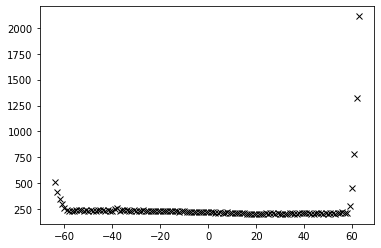

In [3]:
plt.plot(SubChannel, yy2[packet]-yy1[packet], 'kx')


+------------+------------------+------+---------------+-----------------------------------+-----------+
| Packet No. | ΔPhase Std. Dev. | RSSI | Total Packets | Packets with ΔPhase Std. Dev. < 5 | % Packets |
+------------+------------------+------+---------------+-----------------------------------+-----------+
|     11     |       4.16       | -43  |      361      |                111                |    30.7   |
+------------+------------------+------+---------------+-----------------------------------+-----------+


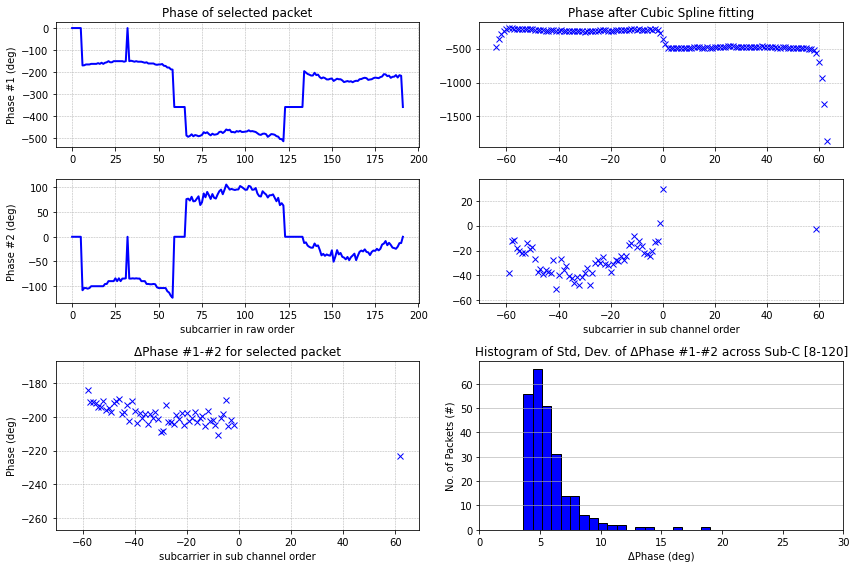

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import helper
import matplotlib.gridspec as gridspec
from prettytable import PrettyTable


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

# data_1 = "CSI_1"
# data_2 = "CSI_2"

data_1 = "S3_wired_intclk_1_5"
data_2 = "S3_wired_intclk_2_5"

# helper.match_packets(data_1, data_2, data_dir)

packet = 11


# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

NumPCT = min(len(T1), len(T2))
lengCM = T1.iloc[0, 22]  # Assuming indexing starts from 0
RSSI = T1.iloc[packet, 3]

C1, C2, CMatrix1, PMatrix1, CMatrix2, PMatrix2 = [], [], [], [], [], []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.unwrap(np.array(PMatrix1))*180/np.pi
PMatrix2 = np.unwrap(np.array(PMatrix2))*180/np.pi

SubChannel = np.arange(-64, 64)
PhaseSub1 = np.column_stack((PMatrix1[:, 128:192], PMatrix1[:, 64:128]))
PhaseSub2 = np.column_stack((PMatrix2[:, 128:192], PMatrix2[:, 64:128]))

PhaseSubShiftHigh1 = PhaseSub1.copy()
PhaseSubShiftHigh2 = PhaseSub2.copy()


def adjust_phase(phase_value):
    """Adjust phase values to lie within the range [-180, 180]."""
    while phase_value > 180:
        phase_value -= 360
    while phase_value < -180:
        phase_value += 360
    return phase_value



# # Correct the pi/2 shift, sometimes there are inversions which are not solved by just subtracting pi/2
# for i in range(PhaseSubShiftHigh1.shape[0]):
# # for i in range(11,12):


#     difference = adjust_phase((PhaseSubShiftHigh1[i, 60]) - (PhaseSubShiftHigh1[i, 66]))
#     difference2 = adjust_phase((PhaseSubShiftHigh2[i, 60]) - (PhaseSubShiftHigh2[i, 66]))

#     # print(difference)
#     while abs(difference) > 90:
#         print("2:" ,difference)

#         if difference > 90:
#             PhaseSubShiftHigh1[i, 66:123] -= 90
#         elif difference < -90:
#             PhaseSubShiftHigh1[i, 66:123] += 90

#         difference = adjust_phase((np.min(PhaseSubShiftHigh1[i, 60]) - np.max(PhaseSubShiftHigh1[i, 66])))
#         print("3: ", difference)

#     while (PhaseSubShiftHigh1[i, 100]) < (PhaseSubShiftHigh1[i, 30]):
#         PhaseSubShiftHigh1[i, 66:123] += 90
#     #     difference = np.min(PhaseSubShiftHigh1[i, 6: 60]) - np.max(PhaseSubShiftHigh1[i, 66: 120])
    
#     while abs(difference2) > 90:
#         print("2:" ,difference)

#         if difference2 > 90:
#             PhaseSubShiftHigh2[i, 66:123] -= 90
#         elif difference2 < -90:
#             PhaseSubShiftHigh2[i, 66:123] += 90

#         difference2 = adjust_phase(
#             (np.min(PhaseSubShiftHigh2[i, 60]) - np.max(PhaseSubShiftHigh2[i, 66])))
#         print("3: ", difference)

#     while (PhaseSubShiftHigh2[i, 100]) < (PhaseSubShiftHigh2[i, 30]):
#         PhaseSubShiftHigh2[i, 66:123] += 90
    



    # # shift1 = PhaseSubShiftHigh1[i, 15]-PhaseSubShiftHigh1[i, 105]
    # shift1 = np.min(PhaseSubShiftHigh1[i, 6: 60]) - \
    #     np.max(PhaseSubShiftHigh1[i, 66: 120])
    # multiplier1 = shift1//90+1
    # # shift2 = PhaseSubShiftHigh2[i, 15]-PhaseSubShiftHigh2[i, 105]
    # shift2 = np.min(PhaseSubShiftHigh2[i, 6: 60]) - \
    #     np.max(PhaseSubShiftHigh2[i, 66: 120])
    # multiplier2 = shift2//90+1

    # if shift1 > 0:
    #     PhaseSubShiftHigh1[i, 66:123] -= 90*multiplier1  # np.pi/2
    # else:
    #     PhaseSubShiftHigh1[i, 66:123] += 90*multiplier1  # np.pi/2
    # if shift2 > 0:
    #     PhaseSubShiftHigh2[i, 66:123] -= 90*multiplier2  # np.pi/2
    # else:
    #     PhaseSubShiftHigh2[i, 66:123] += 90*multiplier2  # np.pi/2
    # # PhaseSubShiftHigh2[i, 66:123] -= 90  # np.pi/2

SubChannelSelect = np.hstack((np.arange(-58, -1), np.arange(2, 59)))
PhaseSubShiftHighSelect1 = PhaseSubShiftHigh1[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]
PhaseSubShiftHighSelect2 = PhaseSubShiftHigh2[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]

yy1, yy2 = [], []

for i in range(NumPCT):
    cs1 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect1[i])
    cs2 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect2[i])

    yy1.append(cs1(SubChannel))
    yy2.append(cs2(SubChannel))

yy1 = np.array(yy1)
yy2 = np.array(yy2)


# ... [your code before plotting remains unchanged]

fig = plt.figure(figsize=(12, 8))

# Main gridspec layout
gs_main = gridspec.GridSpec(2, 2, height_ratios=[2, 1.2])

# Nested gridspec layout for the first larger subplot
gs_nested = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[0, 0])
gs_nested2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[0, 1])


# First two nested subplots
med = np.median(PMatrix1[packet])
ax1 = plt.Subplot(fig, gs_nested[0])
ax1.plot(PMatrix1[packet], linewidth=2, color='blue')
# ax1.axhline(med, color='red', linestyle='--', label='Median')
ax1.set_ylabel("Phase #1 (deg)")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax1.set_ylim([-200,200])
ax1.set_title("Phase of selected packet")
fig.add_subplot(ax1)

med = np.median(PMatrix2[packet])
ax2 = plt.Subplot(fig, gs_nested[1])
ax2.plot(PMatrix2[packet], linewidth=2, color='blue')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_ylabel("Phase #2 (deg)")
ax2.set_xlabel("subcarrier in raw order")
# ax2.set_ylim([-200, 200])

fig.add_subplot(ax2)

# Remaining subplots
med = np.median(yy1[packet])
ax3 = plt.Subplot(fig, gs_nested2[0])
ax3.plot(SubChannel, yy1[packet], 'bx')
# ax3.set_ylim([med-50, med+50])
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.set_title("Phase after Cubic Spline fitting")
fig.add_subplot(ax3)

med = np.median(yy2[packet])
ax4 = plt.Subplot(fig, gs_nested2[1])
ax4.plot(SubChannel, yy2[packet], 'bx')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
ax4.set_ylim([med-50, med+50])
ax4.set_xlabel("subcarrier in sub channel order")
fig.add_subplot(ax4)

med = np.median(yy1[packet]-yy2[packet])
ax5 = plt.Subplot(fig, gs_main[1, 0])
ax5.plot(SubChannel, yy1[packet]-yy2[packet], 'bx')
ax5.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax5.set_ylim([-200, 200])
ax5.set_ylim([med-50, med+50])

ax5.set_ylabel("Phase (deg)")
ax5.set_xlabel("subcarrier in sub channel order")
ax5.set_title("\u0394Phase #1-#2 for selected packet")

fig.add_subplot(ax5)

stan = np.std((yy1[:, 8:120]-yy2[:, 8:120]), axis=1)
# print((stan))
stan = stan[stan < 100]
# print(len(stan))

# plt.hist(stan, bins=20)

ax6 = plt.Subplot(fig, gs_main[1, 1])
ax6.hist(stan, bins=20, color='blue', edgecolor='black')
ax6.set_ylabel("No. of Packets (#)")
ax6.set_xlabel("\u0394Phase (deg)")
ax6.set_title(
    "Histogram of Std, Dev. of \u0394Phase #1-#2 across Sub-C [8-120]")
ax6.set_xlim((0, 30))
ax6.grid(axis='y', alpha=0.75)
fig.add_subplot(ax6)


results = PrettyTable()

# Set column names
results.field_names = ["Packet No.", "\u0394Phase Std. Dev.", "RSSI",
                       "Total Packets", "Packets with \u0394Phase Std. Dev. < 5", "% Packets"]

# Add rows
num_sel_packets = len(stan[stan < 5])
results.add_row([packet, helper.to_3_sig(stan[packet]),
                RSSI, NumPCT, num_sel_packets, helper.to_3_sig(num_sel_packets*100/NumPCT)])
print(results)

plt.tight_layout()

plt.show()


In [5]:
shift1 = np.min(PhaseSubShiftHigh1[11, 6: 60]) -  np.max(PhaseSubShiftHigh1[11, 66: 120])
print(shift1)
multiplier1 = shift1//90+1
print(multiplier1)


35.432910535928755
1.0


In [30]:
print( np.min(PhaseSubShiftHigh1[11, 6: 60]))
print(np.max(PhaseSubShiftHigh1[11, 66: 120]))


-246.97450799147194
-282.4074185274007


In [44]:
print(np.min(PhaseSubShiftHigh1[11, 60]))
print(np.max(PhaseSubShiftHigh1[11, 66]))


-225.6160599083992
-489.80557109226527


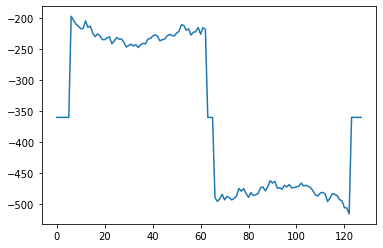

In [45]:
plt.plot(PhaseSubShiftHigh1[11])

In [15]:
difference

-92.99530328760274

In [89]:
PhaseSubShiftHigh2[11, 66:123] -= 90*1


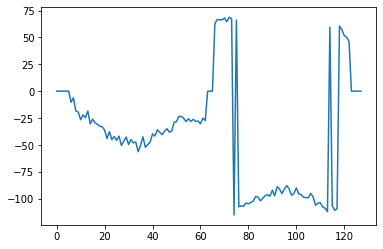

In [151]:
plt.plot(PhaseSubShiftHigh1[1])

In [137]:
adjust_phase((PhaseSubShiftHigh1[1, 60]) -(PhaseSubShiftHigh1[1, 66]) )


176.9707497687015

In [269]:
def adjust_phase(phase_values):
    """Adjust phase values to lie within the range [-180, 180]."""
    return (phase_values + 180) % 360 - 180


def shift_to_within_90(reference, to_adjust):
    """Shift the phase values of the second array to be within ±90 of the first array."""
    difference = adjust_phase(to_adjust - reference)

    # While there are differences outside the range [-90, 90], adjust the values
    while abs(difference) > 90 :
        if difference > 90:
            to_adjust -= 180
        elif difference < -90:
            to_adjust += 180
        difference = adjust_phase(to_adjust - reference)

    return adjust_phase(to_adjust)


adjusted_p2 = shift_to_within_90(np.mean(PhaseSubShiftHigh1[1,6:55]), np.mean(PhaseSubShiftHigh1[1,66:115]))


In [270]:
adjusted_p2


-102.54271721549595

In [241]:
PhaseSubShiftHigh1[1, 66:123] += ((adjusted_p2+1)//90)*90


In [259]:
PhaseSubShiftHigh1[1, 66:123] += ((adjusted_p2)//90)*90


In [276]:
((adjusted_p2+10)//90)


-2.0

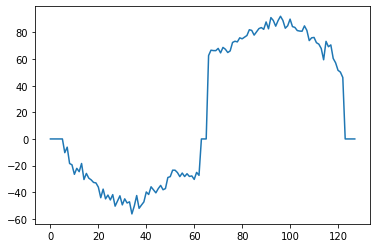

In [264]:
plt.plot(PhaseSubShiftHigh1[1])

In [136]:
difference

176.9707497687015

In [125]:
print(PhaseSubShiftHigh2[11, 100] )
(PhaseSubShiftHigh2[11, 30])

95.31454566994475


-45.70731936854426

In [150]:
PhaseSubShiftHigh1[1, 66:123] = adjusted_p2


In [146]:
PhaseSubShiftHigh1[1,2:59]

array([  0.        ,   0.        ,   0.        ,   0.        ,
       -10.30484647,  -6.1701751 , -18.43494882, -19.44003483,
       -26.56505118, -22.06789956, -24.56717132, -18.43494882,
       -30.46554492, -25.906508  , -29.4274564 , -30.7354877 ,
       -32.66091272, -33.02386756, -36.19320731, -44.1449026 ,
       -37.69424047, -45.        , -42.13759477, -45.80692946,
       -41.82016988, -50.47736873, -46.50743576, -42.70938996,
       -49.51398846, -45.        , -48.09405806, -47.23117461,
       -56.30993247, -50.33215888, -42.51044708, -52.12501635,
       -49.63546343, -47.29061004, -39.80557109, -41.72951208,
       -35.94211187, -38.15722659, -40.48601154, -37.30394828,
       -34.90249562, -38.15722659, -37.2664019 , -28.95099521,
       -28.30075577, -23.45902408, -23.45902408, -25.25316339,
       -28.30075577, -25.60218755, -28.23744554, -26.13100054,
       -28.17859011])

+------------+------------------+------+---------------+
| Packet No. | ΔPhase Std. Dev. | RSSI | Total Packets |
+------------+------------------+------+---------------+
|     15     |       6.73       | -43  |      114      |
+------------+------------------+------+---------------+


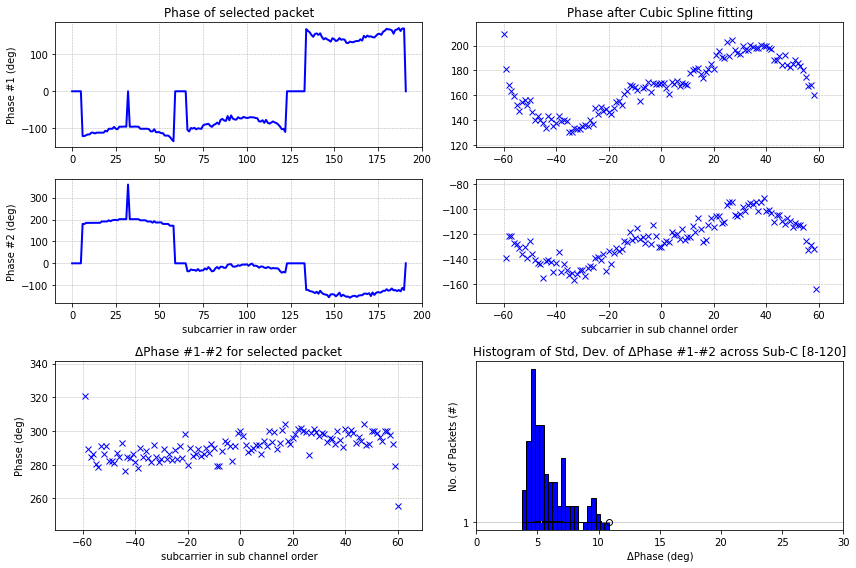

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import helper
import matplotlib.gridspec as gridspec
from prettytable import PrettyTable


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

# data_1 = "CSI_1"
# data_2 = "CSI_2"

data_1 = "S3_wired_intclk_1_2"
data_2 = "S3_wired_intclk_2_2"

helper.match_packets(data_1, data_2, data_dir)

packet = 15  # This is the chosen packet for analysis


# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

NumPCT = min(len(T1), len(T2))
lengCM = T1.iloc[0, 22]  # Assuming indexing starts from 0
RSSI = T1.iloc[packet, 3]

C1, C2, CMatrix1, PMatrix1, CMatrix2, PMatrix2 = [], [], [], [], [], []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        # p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        # p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    # PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    # PMatrix2.append(p_matrix_2_row)

CMatrix1 = np.array(CMatrix1)
CMatrix2 = np.array(CMatrix2)

# plt.plot(np.unwrap(np.angle(CMatrix1[packet])))
# plt.figure()

SubChannel = np.arange(-64, 64)
CSub1 = np.column_stack((CMatrix1[:, 128:192], CMatrix1[:, 64:128]))
CSub2 = np.column_stack((CMatrix2[:, 128:192], CMatrix2[:, 64:128]))

# plt.plot(PhaseSub1[packet])

CSubShiftHigh1 = CSub1.copy()
CSubShiftHigh2 = CSub2.copy()

SubChannelSelect = np.hstack((np.arange(-58, -1), np.arange(2, 59)))
CSubShiftHighSelect1 = CSubShiftHigh1[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]
CSubShiftHighSelect2 = CSubShiftHigh2[:, np.hstack(
    (np.arange(6, 63), np.arange(66, 123)))]

# CMatrix1 = PhaseSubShiftHighSelect1
# CMatrix2 = PhaseSubShiftHighSelect2

# CMatrix1 = (np.fft.fftshift(PhaseSubShiftHighSelect1, axes=1))
# CMatrix2 = (np.fft.fftshift(PhaseSubShiftHighSelect2, axes=1))

nsc = CSubShiftHighSelect1.shape[1]
CSubShiftHighSelect1[:, (nsc + 1) // 2:] = -1j * \
    CSubShiftHighSelect1[:, (nsc + 1) // 2:]
CSubShiftHighSelect2[:, (nsc + 1) // 2:] = -1j * \
    CSubShiftHighSelect2[:, (nsc + 1) // 2:]

PMatrix1 = (np.unwrap(np.angle(CMatrix1)))*180/np.pi
PMatrix2 = (np.unwrap(np.angle(CMatrix2)))*180/np.pi

# PMatrix1 = np.unwrap(np.angle(PhaseSubShiftHighSelect1), axis=1)*180/np.pi
# PMatrix2 = np.unwrap(np.angle(PhaseSubShiftHighSelect2), axis=1)*180/np.pi


PhaseSubShiftHighSelect1 = np.unwrap(
    np.angle(CSubShiftHighSelect1), axis=1)*180/np.pi
PhaseSubShiftHighSelect2 = np.unwrap(
    np.angle(CSubShiftHighSelect2), axis=1)*180/np.pi

# PhaseSubShiftHighSelect1 = PMatrix1
# PhaseSubShiftHighSelect2 = PMatrix2


# PhaseSubShiftHighSelect1

yy1, yy2 = [], []

for i in range(NumPCT):
    cs1 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect1[i])
    cs2 = CubicSpline(SubChannelSelect, PhaseSubShiftHighSelect2[i])

    yy1.append(cs1(SubChannel))
    yy2.append(cs2(SubChannel))

yy1 = np.array(yy1)
yy2 = np.array(yy2)


# ... [your code before plotting remains unchanged]

fig = plt.figure(figsize=(12, 8))

# Main gridspec layout
gs_main = gridspec.GridSpec(2, 2, height_ratios=[2, 1.2])

# Nested gridspec layout for the first larger subplot
gs_nested = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[0, 0])
gs_nested2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[0, 1])


# First two nested subplots
med = np.median(PMatrix1[packet])
ax1 = plt.Subplot(fig, gs_nested[0])
ax1.plot(PMatrix1[packet], linewidth=2, color='blue')
# ax1.axhline(med, color='red', linestyle='--', label='Median')
ax1.set_ylabel("Phase #1 (deg)")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax1.set_ylim([-200,200])
ax1.set_title("Phase of selected packet")
fig.add_subplot(ax1)

med = np.median(PMatrix2[packet])
ax2 = plt.Subplot(fig, gs_nested[1])
if data_1 == data_2:
    ax2.plot(PhaseSubShiftHighSelect2.T)
    ax2.set_ylim([-200, 200])
else:
    ax2.plot(PMatrix2[packet], linewidth=2, color='blue')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_ylabel("Phase #2 (deg)")
ax2.set_xlabel("subcarrier in raw order")
# ax2.set_ylim([-200, 200])

fig.add_subplot(ax2)

# Remaining subplots
med = np.median(yy1[packet])
ax3 = plt.Subplot(fig, gs_nested2[0])
ax3.plot(SubChannel, yy1[packet], 'bx')
ax3.set_ylim([med-50, med+50])
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.set_title("Phase after Cubic Spline fitting")
fig.add_subplot(ax3)

med = np.median(yy2[packet])
ax4 = plt.Subplot(fig, gs_nested2[1])
if data_1 == data_2:
    ax4.plot(SubChannel, yy1.T)
    ax4.set_ylim([-200, 200])
else:
    ax4.plot(SubChannel, yy2[packet], 'bx')
    ax4.set_ylim([med-50, med+50])

ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
ax4.set_xlabel("subcarrier in sub channel order")
fig.add_subplot(ax4)

med = np.median(yy1[packet]-yy2[packet])
ax5 = plt.Subplot(fig, gs_main[1, 0])
ax5.plot(SubChannel, yy1[packet]-yy2[packet], 'bx')
ax5.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax5.set_ylim([-200, 200])
ax5.set_ylim([med-50, med+50])

ax5.set_ylabel("Phase (deg)")
ax5.set_xlabel("subcarrier in sub channel order")
ax5.set_title("\u0394Phase #1-#2 for selected packet")

fig.add_subplot(ax5)

stan = np.std((yy1[:, 8:120]-yy2[:, 8:120]), axis=1)
# print((stan))
stan = stan[stan < 100]
# print(len(stan))

# plt.hist(stan, bins=20)

ax6 = plt.Subplot(fig, gs_main[1, 1])
ax6.hist(stan, bins=20, color='blue', edgecolor='black')

ax6.set_ylabel("No. of Packets (#)")
ax6.set_xlabel("\u0394Phase (deg)")
ax6.set_title(
    "Histogram of Std, Dev. of \u0394Phase #1-#2 across Sub-C [8-120]")
ax6.set_xlim((0, 30))
ax6.grid(axis='y', alpha=0.75)
fig.add_subplot(ax6)


results = PrettyTable()

# Set column names
# , "Packets with \u0394Phase Std. Dev. < 5", "% Packets"]
results.field_names = ["Packet No.",
                       "\u0394Phase Std. Dev.", "RSSI", "Total Packets"]

# Add rows
num_sel_packets = len(stan[stan < 5])
results.add_row([packet, helper.to_3_sig(stan[packet]),
                RSSI, NumPCT])  # , num_sel_packets, helper.to_3_sig(num_sel_packets*100/NumPCT)])
print(results)

plt.tight_layout()

plt.show()

# print(helper.to_3_sig(num_sel_packets*100/NumPCT))


In [67]:
helper.to_3_sig(num_sel_packets*100/NumPCT)


36.8

(array([ 5., 11., 20., 13., 13.,  7.,  6.,  6.,  3.,  9.,  3.,  3.,  3.,
         0.,  1.,  3.,  4.,  2.,  1.,  1.]),
 array([ 3.73951189,  4.09297463,  4.44643736,  4.7999001 ,  5.15336284,
         5.50682557,  5.86028831,  6.21375104,  6.56721378,  6.92067651,
         7.27413925,  7.62760198,  7.98106472,  8.33452746,  8.68799019,
         9.04145293,  9.39491566,  9.7483784 , 10.10184113, 10.45530387,
        10.80876661]),
 <BarContainer object of 20 artists>)

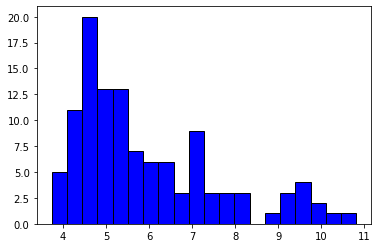

In [82]:
stand = np.std((yy1[:, 8:120]-yy2[:, 8:120]), axis=1)
plt.hist(stand, bins=20, color='blue', edgecolor='black')


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8f1108f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8f110b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8f110acb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8f11081c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8f1109510>],
 'means': []}

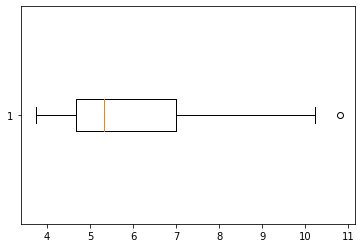

In [84]:
plt.boxplot(stand, vert=False)
